## Fancy Indexing - Integer Arrays

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (masks). It means passing an array of indices to access multiple array elements at once. This method is called fancy indexing. It creates copies not views.

In [1]:
import numpy as np

a = np.arange(12)**2   
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [2]:
# Suppose we want to access three different elements. We could do it like this:

a[2],a[6],a[8]

(4, 36, 64)

In [3]:
# Alternatively, we can pass a single list or array of indices to obtain the same result:

indx_1 = [2,6,8]

a[indx_1]

array([ 4, 36, 64])

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed

In [4]:
indx_2 = np.array([[2,4],[8,10]])

indx_2

array([[ 2,  4],
       [ 8, 10]])

In [5]:
a[indx_2]

array([[  4,  16],
       [ 64, 100]])

We can also give indexes for more than one dimension. The arrays of indices for each dimension must have the same shape.



In [6]:
food = np.array([["blueberry","strawberry","cherry","blackberry"],
                 ["pinenut","hazelnuts","cashewnut","coconut"],
                 ["mustard","paprika","nutmeg","clove"]])

food

array([['blueberry', 'strawberry', 'cherry', 'blackberry'],
       ['pinenut', 'hazelnuts', 'cashewnut', 'coconut'],
       ['mustard', 'paprika', 'nutmeg', 'clove']], dtype='<U10')

In [7]:
# here (0,0) is blueberry (0,3) is blackberry (2,0) is mustard and (2,3) is clove

row = np.array([[0,0],[2,2]])
col = np.array([[0,3],[0,3]])

food[row,col]

array([['blueberry', 'blackberry'],
       ['mustard', 'clove']], dtype='<U10')

In [8]:
food[row,col] ='0000'

In [9]:
food

array([['0000', 'strawberry', 'cherry', '0000'],
       ['pinenut', 'hazelnuts', 'cashewnut', 'coconut'],
       ['0000', 'paprika', 'nutmeg', '0000']], dtype='<U10')

## Fancy Indexing - Boolean Arrays

In [10]:
a = np.arange(12)

In [11]:
index_1 = a>9

In [12]:
a[index_1]

array([10, 11])

In [13]:
a<6

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False])

In [14]:
# how many true value exists in boolean array

np.count_nonzero(a<6)

6

In [15]:
np.sum(a<6)

6

In [16]:
np.sum(a[a<6])

15

In [17]:
a = np.arange(16).reshape(4,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [18]:
# first 4 elements in a first row is less than 6, first 2 elements in second row is less than 6
np.sum(a < 6, axis=1)

array([4, 2, 0, 0])

In [19]:
np.any(a<6)

True

In [20]:
np.all(a<6)

False

In [21]:
np.all(a < 6, axis=1)

array([ True, False, False, False])

## Indexing with Structured Arrays


Structured arrays or record arrays are useful when you perform computations, and at the same time you could keep closely related data together. Structured arrays provide efficient storage for compound, heterogeneous data.

NumPy also provides powerful capabilities to create arrays of records, as multiple data types live in one NumPy array. However, one principle in NumPy that still needs to be honored is that the data type in each field (think of this as a column in the records) needs to be homogeneous.

In [22]:
# Imagine that we have several categories of data on a number of students say, name, roll number, and test scores.

name  = ["Alice","Beth","Cathy","Dorothy"]
studentId  = [1,2,3,4]
score = [85.4,90.4,87.66,78.9]

There's nothing here that tells us that the three arrays are related; it would be more natural if we could use a single structure to store all of this data.

Define the np array with the names of the 'columns' and the data format for each
U10 represents a 10-character Unicode string
i4 is short for int32 (i for int, 4 for 4 bytes)
f8 is shorthand for float64

In [23]:
import numpy as np
student_data = np.zeros(4, dtype={'names':('name', 'studentId', 'score'),
                          'formats':('U10', 'i4', 'f8')})

In [24]:
# Now that we've created an empty container array, we can fill the array with our lists of values

student_data['name'] = name
student_data['studentId'] = studentId
student_data['score'] = score

In [25]:
print(student_data)
student_data.shape

[('Alice', 1, 85.4 ) ('Beth', 2, 90.4 ) ('Cathy', 3, 87.66)
 ('Dorothy', 4, 78.9 )]


(4,)

In [26]:
# The handy thing with structured arrays is that you can now refer to values either by index or by name

print(student_data['name'])
print(student_data[1])

['Alice' 'Beth' 'Cathy' 'Dorothy']
('Beth', 2, 90.4)


In [27]:
student_data[student_data['score'] > 85]

array([('Alice', 1, 85.4 ), ('Beth', 2, 90.4 ), ('Cathy', 3, 87.66)],
      dtype=[('name', '<U10'), ('studentId', '<i4'), ('score', '<f8')])

In [28]:
#Get names where score is above 85
student_data[student_data['score'] > 85]['name']

array(['Alice', 'Beth', 'Cathy'], dtype='<U10')

## Working with CSV Data


!pip install --user pandas


!pip install --user matplotlib


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

We will load the GDP per capita (in US dollars) data for all the countries in the world for the year 2016 into a variable using pandas

In [55]:
gdp = pd.read_csv("data/gdp_pc.csv")

In [56]:
gdp

,Country Name,2016
0,Aruba,NaN
1,Afghanistan,1944.117005
2,Angola,6454.135370
3,Albania,11540.025561
4,Andorra,NaN
...,...,...
259,Kosovo,10063.758475
260,"Yemen, Rep.",2507.471662
261,South Africa,13196.811227
262,Zambia,3933.066460


In [57]:
type(gdp)

pandas.core.frame.DataFrame

In [58]:
gdp_16 = gdp["2016"].values
type(gdp_16)


numpy.ndarray

In [59]:
gdp_16.shape

(264,)

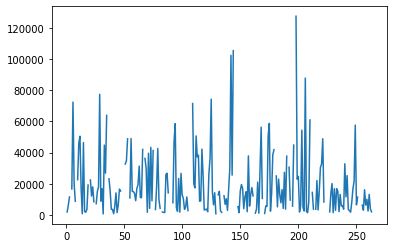

In [60]:
plt.plot(gdp_16)
plt.show()

In [61]:
# The complement operator (~) can be used to remove nan elements

gdp_16 = gdp_16[~np.isnan(gdp_16)]

gdp_16.shape

(229,)

In [62]:
np.max(gdp_16)

127480.482510991

In [63]:
np.median(gdp_16)

13113.9710833787

In [64]:
np.mean(gdp_16)

19135.51651250454

In [65]:
gdp_16[gdp_16 > 40000]

array([ 72399.65347339,  46012.32845157,  50551.5531752 ,  46428.67142458,
        77420.61217204,  44819.48360027,  63888.73238665,  48860.52529211,
        49029.01483891,  42063.79406454,  43378.14602882,  41343.29253554,
        42656.2166022 ,  46864.95679091,  58617.97062639,  71472.29596487,
        50745.68297711,  42281.18818958,  74263.99862606, 102389.43772763,
       105420.41423718,  56344.96375629,  50538.6065696 ,  58790.06140389,
        41885.92611335,  44804.46017271, 127480.48251099,  54416.61249319,
        87832.58651422,  60932.93003722,  48904.55437072,  57638.15908799])

In [66]:
np.count_nonzero(gdp_16[gdp_16 > 40000]) 

32

In [67]:
help(np.count_nonzero)

Help on function count_nonzero in module numpy:

count_nonzero(a, axis=None, *, keepdims=False)
    Counts the number of non-zero values in the array ``a``.
    
    The word "non-zero" is in reference to the Python 2.x
    built-in method ``__nonzero__()`` (renamed ``__bool__()``
    in Python 3.x) of Python objects that tests an object's
    "truthfulness". For example, any number is considered
    truthful if it is nonzero, whereas any string is considered
    truthful if it is not the empty string. Thus, this function
    (recursively) counts how many elements in ``a`` (and in
    sub-arrays thereof) have their ``__nonzero__()`` or ``__bool__()``
    method evaluated to ``True``.
    
    Parameters
    ----------
    a : array_like
        The array for which to count non-zeros.
    axis : int or tuple, optional
        Axis or tuple of axes along which to count non-zeros.
        Default is None, meaning that non-zeros will be counted
        along a flattened version of ``a``.
 

In [68]:
# 10 Lowest gdp per capita

np.sort(gdp_16)[0:10]
np.sort(gdp_16)[0:10]


array([ 698.70665573,  777.75285166,  801.63011974,  812.67394381,
        986.20696062, 1168.82562558, 1216.79278744, 1476.21371969,
       1490.53623573, 1506.23832521])

In [69]:
# 10 highest gdp per capita

np.sort(gdp_16)[219:]

array([ 60932.93003722,  63888.73238665,  71472.29596487,  72399.65347339,
        74263.99862606,  77420.61217204,  87832.58651422, 102389.43772763,
       105420.41423718, 127480.48251099])

In [70]:
#How many countries have gdp per capita higher than India?
#India's is 6570.6 USD (2016).

#Use fancy indexing to get values from an array which match a condition
np.count_nonzero(gdp_16[gdp_16 > 6570.6])

152

## Automatic Reshaping

In [71]:
a = np.arange(30)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [72]:
# -1 means "whatever is needed"
a.shape = 2,-1,3

In [73]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

In [74]:
a.shape

(2, 5, 3)

In [75]:
a.shape = 2,3,-1

In [76]:
a

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

## Vector Stacking

1. concatenate
The arrays must have the same shape, except in the dimension corresponding to axis. The default axis along which the arrays will be joined is 0.

In [77]:
x = np.array([["US","France"],["Australia","Germany"]])
y = np.array([["India","Japan"],["Nepal","China"]])



In [78]:
print(x)
print(x.shape)

[['US' 'France']
 ['Australia' 'Germany']]
(2, 2)


In [79]:
print(y)
print(y.shape)


[['India' 'Japan']
 ['Nepal' 'China']]
(2, 2)


In [80]:
# The default is row-wise concatenation for a 2D array
print('Joining two arrays along axis 0')
np.concatenate((x,y))


Joining two arrays along axis 0


array([['US', 'France'],
       ['Australia', 'Germany'],
       ['India', 'Japan'],
       ['Nepal', 'China']], dtype='<U9')

In [81]:
# Column-wise
print('Joining two arrays along axis 1')
np.concatenate((x,y), axis = 1)

Joining two arrays along axis 1


array([['US', 'France', 'India', 'Japan'],
       ['Australia', 'Germany', 'Nepal', 'China']], dtype='<U9')

2. stack

In [82]:

a = np.array([1, 2, 3])
b = np.array([2, 3, 4])

In [83]:
np.stack((a, b))

array([[1, 2, 3],
       [2, 3, 4]])

In [84]:
studentId = np.array([1,2,3,4])
name   = np.array(["Sam","Alice","Bob","Harry"])
scores  = np.array([80,89,20,11])

In [85]:
np.stack((studentId, name, scores))

array([['1', '2', '3', '4'],
       ['Sam', 'Alice', 'Bob', 'Harry'],
       ['80', '89', '20', '11']], dtype='<U21')

In [86]:
np.stack((studentId, name, scores)).shape

(3, 4)

In [87]:
np.stack((studentId, name, scores), axis =1)

array([['1', 'Sam', '80'],
       ['2', 'Alice', '89'],
       ['3', 'Bob', '20'],
       ['4', 'Harry', '11']], dtype='<U21')

3. vstack
Stacks row wise

In [88]:
np.vstack((studentId, name, scores)) 

array([['1', '2', '3', '4'],
       ['Sam', 'Alice', 'Bob', 'Harry'],
       ['80', '89', '20', '11']], dtype='<U21')

4. hstack
Stacks column wise

In [89]:
np.hstack((studentId, name, scores)) 

array(['1', '2', '3', '4', 'Sam', 'Alice', 'Bob', 'Harry', '80', '89',
       '20', '11'], dtype='<U21')

## Example

Create an array of shape(3,4). Find the mean and median of array row wise and column wise. Print the array value if each cell value is greater than 5 other wise print 0.

## Further reading

* http://www.python.org - The official web page of the Python programming language.
* http://www.python.org/dev/peps/pep-0008 - Style guide for Python programming. Highly recommended. 
* http://www.greenteapress.com/thinkpython/ - A free book on Python programming.
* [Python Essential Reference](http://www.amazon.com/Python-Essential-Reference-4th-Edition/dp/0672329786) - A good reference book on Python programming.

## Source

* Numpy-working-with-multidimensional-data, Janani Ravi, https://app.pluralsight.com/library/

* Based on J.R. Johansson (jrjohansson at gmail.com) online training materials The latest version of this IPython notebook lecture is available at http://github.com/jrjohansson/scientific-python-lectures. The other notebooks in this lecture series are indexed at http://jrjohansson.github.io.






Numpy Array Operation Summary: https://www.w3resource.com/python-exercises/numpy/index.php